# Boston Housing Data

predicting price of house having certain features.

## Creator = Rohan Kumar

In [1]:
# importing all necessary libraries

# regular EDA(Explanatory Data Analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

# Data preprocessing and feature selection
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# scikit-learn models
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor

# some metrics for model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Exploring Data

In [2]:
# loading dataset
from sklearn.datasets import load_boston

boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
# creating a DataFrame
features = pd.DataFrame(boston['data'], columns = boston['feature_names'])
target = pd.DataFrame(boston['target'], columns = ['Price'])

In [4]:
# dataset description
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# to look at whole house with their features and their respective price
data = features.copy()
data['Price'] = target

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
# some basic statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [9]:
# findind correlation matrix
corr_mat = data.corr()
corr_mat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


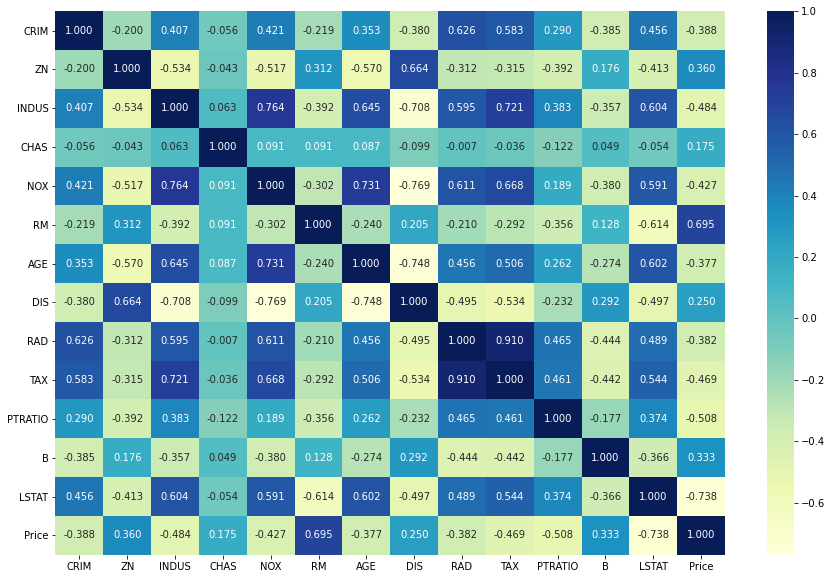

In [10]:
# plotting it to get better visuals
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_mat, annot=True, cmap='YlGnBu', fmt='0.3f')
plt.show()

* `NOX` and `INDUS` with 0.764
* `AGE` and `NOX` with 0.731
* `TAX` and `RAD` with 0.910
* `DIS` and `INDUS` with -0.708
* `DIS` and `NOX` with -0.769

c:\users\vio\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


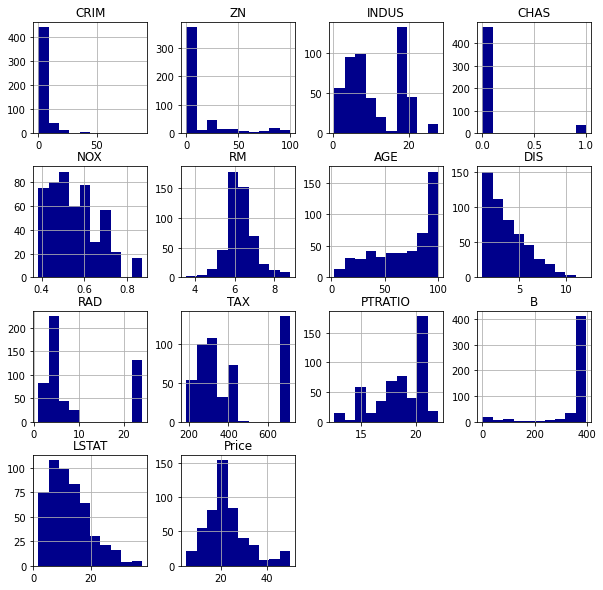

In [11]:
data.hist(sharex=False, sharey=False, figsize=(10,10), color='darkblue')
plt.show()

c:\users\vio\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


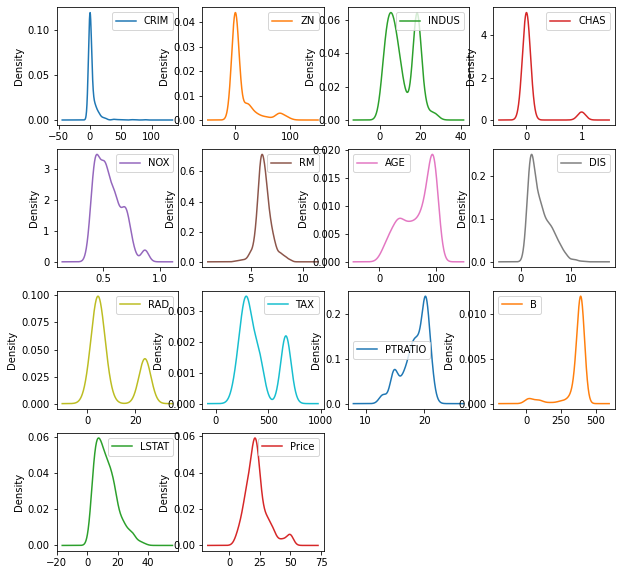

In [12]:
# density
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(10,10))
plt.show()

c:\users\vio\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


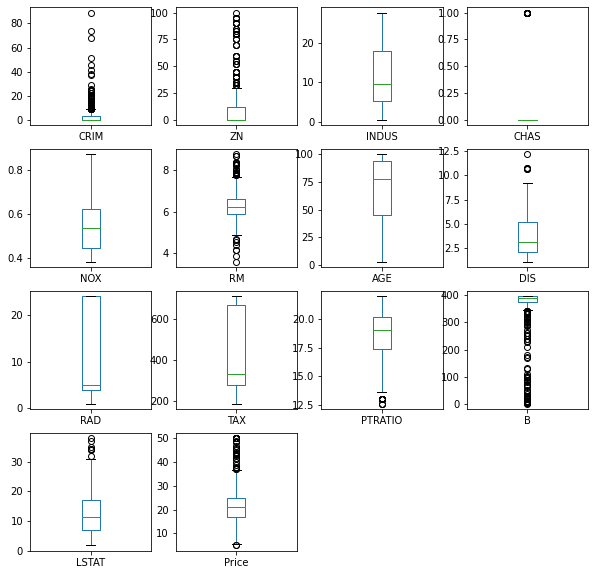

In [13]:
# boxplot for outliers
data.plot(kind='box', subplots=True, sharex=False, sharey=False, layout=(4,4), figsize=(10,10));
plt.show()

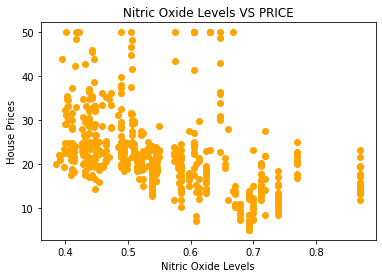

In [14]:
plt.scatter(x='NOX', y='Price', data= data, color='orange')
plt.title('Nitric Oxide Levels VS PRICE')
plt.xlabel('Nitric Oxide Levels')
plt.ylabel('House Prices')
plt.show()

**Clearly, as Nitric Oxide increases, price of the houses decreases**

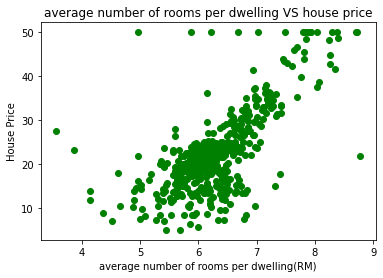

In [15]:
plt.scatter(x='RM', y='Price', data = data, color='green')
plt.title('average number of rooms per dwelling VS house price')
plt.xlabel('average number of rooms per dwelling(RM)')
plt.ylabel('House Price')
plt.show()

**Generally, people are buying houses with average number of rooms per dwelling = 6**

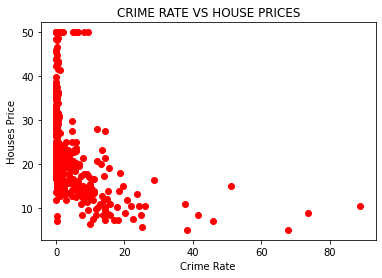

In [16]:
plt.scatter(x='CRIM', y='Price', data=data, color='red')
plt.title('CRIME RATE VS HOUSE PRICES')
plt.xlabel('Crime Rate')
plt.ylabel('Houses Price')
plt.show()

**Clearly, people insist on living in crime free place and also puts a huge amount too for some places.**

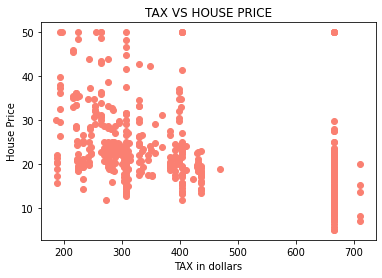

In [17]:
plt.scatter(x='TAX', y='Price', data=data, color='salmon')
plt.title('TAX VS HOUSE PRICE')
plt.xlabel('TAX in dollars')
plt.ylabel('House Price')
plt.show()

**Clearly, we can see two clusters of peoples.**

In [18]:
# Machine Learning Modelling Starts...

### Baseline models

In [19]:
# extracting target(y) and features(X) from dataset
y = data['Price']
X = data.drop(columns = 'Price')

In [20]:
# Splitting into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [21]:
# creating models list
models=[]

models.append(('linear_reg' , LinearRegression()))
models.append(('lasso' , Lasso()))
models.append(('ElasticNet' , ElasticNet()))
models.append(('ridge' , Ridge()))
models.append(('DecisionTree' , DecisionTreeRegressor()))
models.append(('KNN' , KNeighborsRegressor()))
models.append(('SVR' , SVR()))
models.append(('RandomForest' , RandomForestRegressor()))
models.append(('GradientBoosting' , GradientBoostingRegressor()))
models.append(('AdaBoost' , AdaBoostRegressor()))
models.append(('ExtraTrees' , ExtraTreesRegressor()))

In [22]:
# creating results list to store results of each model
results = []
# creating name list to store each model name
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=35)
    model_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(model_result)
    names.append(name)

In [23]:
for name, result in zip(names,results):
    print(f'{name} : {result.mean()} ({result.std()})')

linear_reg : -24.191619371835866 (9.623002188551006)
lasso : -29.513563920275498 (9.062300000020322)
ElasticNet : -28.565327356104735 (8.800915886010054)
ridge : -24.29861013002011 (9.880270064556255)
DecisionTree : -24.9871920341394 (14.585613700759518)
KNN : -44.27755991465149 (18.455166087969335)
SVR : -70.4179724866042 (20.72223084685684)
RandomForest : -12.79726410768137 (5.808487647491332)
GradientBoosting : -10.788725596821479 (4.667045579376947)
AdaBoost : -16.633462246329493 (8.569416786497055)
ExtraTrees : -11.050143397866286 (5.764794726909855)


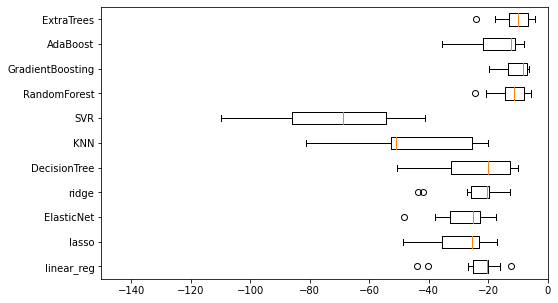

In [24]:
# plottig to see which one did great
fig, ax = plt.subplots(figsize=(8,5))
ax = plt.boxplot(results, labels=names, vert=False)
plt.xlim((-150,0))
plt.show()

**Clearly, ExtraTrees did a marvelous job as a baseline model.**

### Checking models score again after scaling of data using Pipeline

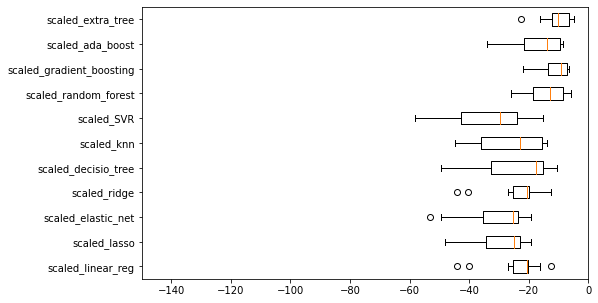

In [25]:
# creating scaling models pipeline
pipeline = []

pipeline.append((('scaled_linear_reg' , Pipeline([('scaler', StandardScaler()),('linear_reg' ,LinearRegression())]))))
pipeline.append((('scaled_lasso' , Pipeline([('scaler', StandardScaler()),('lasso' , Lasso())]))))
pipeline.append((('scaled_elastic_net' , Pipeline([('scaler', StandardScaler()),('ElasticNet' , ElasticNet())]))))
pipeline.append((('scaled_ridge' , Pipeline([('scaler', StandardScaler()),('ridge' , Ridge())]))))
pipeline.append((('scaled_decisio_tree' , Pipeline([('scaler', StandardScaler()),('DecisionTree' , DecisionTreeRegressor())]))))
pipeline.append((('scaled_knn' , Pipeline([('scaler', StandardScaler()),('KNN' , KNeighborsRegressor())]))))
pipeline.append((('scaled_SVR' , Pipeline([('scaler', StandardScaler()),('SVR' , SVR())]))))
pipeline.append((('scaled_random_forest' , Pipeline([('scaler', StandardScaler()),('RandomForest' , RandomForestRegressor())]))))
pipeline.append((('scaled_gradient_boosting' , Pipeline([('scaler', StandardScaler()),('GradientBoosting' , GradientBoostingRegressor())]))))
pipeline.append((('scaled_ada_boost' , Pipeline([('scaler', StandardScaler()),('AdaBoost' , AdaBoostRegressor())]))))
pipeline.append((('scaled_extra_tree' , Pipeline([('scaler', StandardScaler()),('ExtraTrees' , ExtraTreesRegressor())]))))

# creating results list to store results of each scaled model
s_results = []
# creating name list to store each scaled_model name
s_names = []

for name, model in pipeline:
    kfold = KFold(n_splits=10, shuffle=True, random_state=35)
    model_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    s_results.append(model_result)
    s_names.append(name)
    
# plottig to see which one did great
fig, ax = plt.subplots(figsize=(8,5))
ax = plt.boxplot(s_results, labels=s_names, vert=False)
plt.xlim((-150,0))
plt.show()

**Clearly, every model did great with scaled data, than the previous models with unscaled data.**

# We are gonna do it again, but this time, we are deleting some features
**Rejecting multicorrelated features** - Previously while forming correlation matrix we stated some features corelation with other features.

* `NOX` and `INDUS` with 0.764
* `AGE` and `NOX` with 0.731
* `TAX` and `RAD` with 0.910
* `DIS` and `INDUS` with -0.708
* `DIS` and `NOX` with -0.769

So we are dropping `NOX`, `TAX` and `DIS` features.

In [26]:
# new features
X_new = X.drop(columns=['INDUS','DIS'])

# splitting into training and testing datasets
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y, train_size=0.2, random_state=35)

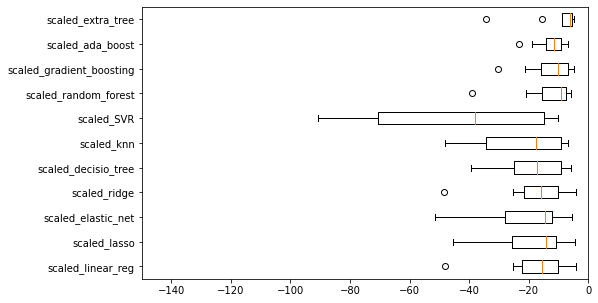

In [27]:
# creating scaling models pipeline
pipeline2 = []

pipeline2.append((('scaled_linear_reg' , Pipeline([('scaler', StandardScaler()),('linear_reg' ,LinearRegression())]))))
pipeline2.append((('scaled_lasso' , Pipeline([('scaler', StandardScaler()),('lasso' , Lasso())]))))
pipeline2.append((('scaled_elastic_net' , Pipeline([('scaler', StandardScaler()),('ElasticNet' , ElasticNet())]))))
pipeline2.append((('scaled_ridge' , Pipeline([('scaler', StandardScaler()),('ridge' , Ridge())]))))
pipeline2.append((('scaled_decisio_tree' , Pipeline([('scaler', StandardScaler()),('DecisionTree' , DecisionTreeRegressor())]))))
pipeline2.append((('scaled_knn' , Pipeline([('scaler', StandardScaler()),('KNN' , KNeighborsRegressor())]))))
pipeline2.append((('scaled_SVR' , Pipeline([('scaler', StandardScaler()),('SVR' , SVR())]))))
pipeline2.append((('scaled_random_forest' , Pipeline([('scaler', StandardScaler()),('RandomForest' , RandomForestRegressor())]))))
pipeline2.append((('scaled_gradient_boosting' , Pipeline([('scaler', StandardScaler()),('GradientBoosting' , GradientBoostingRegressor())]))))
pipeline2.append((('scaled_ada_boost' , Pipeline([('scaler', StandardScaler()),('AdaBoost' , AdaBoostRegressor())]))))
pipeline2.append((('scaled_ExtraTrees' , Pipeline([('scaler', StandardScaler()),('ExtraTrees' , ExtraTreesRegressor())]))))

# creating results list to store results of each scaled model
s_results = []
# creating name list to store each scaled_model name
s_names = []

for name, model in pipeline:
    kfold = KFold(n_splits=10, shuffle=True, random_state=35)
    model_result = cross_val_score(model, X_new_train, y_new_train, cv=kfold, scoring='neg_mean_squared_error')
    s_results.append(model_result)
    s_names.append(name)
    
# plottig to see which one did great
fig, ax = plt.subplots(figsize=(8,5))
ax = plt.boxplot(s_results, labels=s_names, vert=False)
plt.xlim((-150,0))
plt.show()

Now we have to choose one model, which has done marvellous job and try to hypertune it with GridSearchCV.

So i am choosing, GradientBoostingRegressor.

# Hypertuning o GradientBoostingRegressor() using GridsearchCV

We are gonna do modelling on whole scaled data.

In [33]:
# GradientBoostingRegressor parameter grid
gbr_grid = {'n_estimators' : np.arange(10,200,20)}

# creating an instance of the model
gbr = GradientBoostingRegressor(random_state=35)

#scaling training dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

kfold = KFold(n_splits=10, shuffle=True, random_state=35)

gs_gbr = GridSearchCV(estimator = gbr, param_grid = gbr_grid, cv=kfold,
                      scoring='neg_mean_squared_error', verbose=True)

gs_gbr.fit(X_scaled,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=35, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=35),
             param_grid={'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190])},
             scoring='neg_mean_squared_error', verbose=True)

In [37]:
print(f'negative mean squared error = {gs_gbr.score(X_scaled,y_train):0.3f} with parameters : {gs_gbr.best_params_}')

negative mean squared error = -1.551 with parameters : {'n_estimators': 110}


# Finalising the model and making prediction

In [40]:
# final model instance
gbr = GradientBoostingRegressor(n_estimators=110)
gbr.fit(X_scaled, y_train)
y_preds = gbr.predict(scaler.transform(X_test))

# creating a dataframe
prices = pd.DataFrame()
prices['Actual Price'] = y_test
prices['Predicted Price'] = y_preds
prices['Difference'] = np.absolute(prices['Actual Price'] - prices['Predicted Price'])
prices[:10]

,Actual Price,Predicted Price,Difference
292,27.9,28.637422,0.737422
81,23.9,25.536044,1.636044
158,24.3,26.473716,2.173716
117,19.2,20.538395,1.338395
143,15.6,14.390996,1.209004
350,22.9,20.391160,2.508840
397,8.5,12.207959,3.707959
119,19.3,20.516705,1.216705
501,22.4,24.815430,2.415430
273,35.2,40.658637,5.458637


In [47]:
# maximum difference
prices['Difference'].max()

10.17565260145269